In [1]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
mnist

{'COL_NAMES': ['label', 'data'],
 'DESCR': 'mldata.org dataset: mnist-original',
 'data': array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ..., 
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 'target': array([ 0.,  0.,  0., ...,  9.,  9.,  9.])}

In [2]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [3]:
y.shape

(70000,)

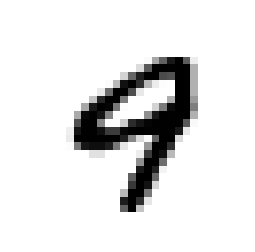

In [4]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
some_digit = X[69999]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = matplotlib.cm.binary,
interpolation="nearest")
plt.axis("off")
plt.show()

In [5]:
y[69999]

9.0

In [6]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [73]:
X2_train, X2_test, y2_train, y2_test = X[:50000], X[50000:], y[:50000], y[50000:]

In [7]:
shuffle_index = np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index], y_train[shuffle_index]
X_train.shape

(60000, 784)

In [74]:
shuffle_index = np.random.permutation(50000)
X2_train, y2_train = X2_train[shuffle_index], y_train[shuffle_index]
X2_train.shape

(50000, 784)

   Linear Classification

In [104]:
from sklearn.linear_model import SGDClassifier
sgd_clf2 = SGDClassifier(random_state=20)
sgd_clf2.fit(X2_train, y2_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:84: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=5, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=20, shuffle=True,
       tol=None, verbose=0, warm_start=False)

In [105]:
sgd_clf2.predict(X2_train)

array([2, 3, 1, ..., 4, 1, 1], dtype=uint8)

    Accuracy

In [108]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf2, X2_train, y2_train, cv=3, scoring="accuracy")

array([ 0.09664647,  0.09695806,  0.09337494])

    Confusion Matrix

In [109]:
from sklearn.model_selection import cross_val_predict
y_train_pred2 = cross_val_predict(sgd_clf2, X2_train, y2_train, cv=3)
print(y_train_pred2)

[0 4 6 ..., 8 1 7]


In [113]:
from sklearn.metrics import confusion_matrix
sgd_conf_mx = confusion_matrix(y2_train, y_train_pred2)
print (sgd_conf_mx)

[[379  63 335 395 567 230 900 759 834 470]
 [476  70 369 452 688 268 979 869 935 572]
 [363  43 299 405 586 220 941 750 873 488]
 [405  33 356 409 598 252 935 752 873 488]
 [381  52 308 419 552 250 915 702 804 476]
 [363  61 308 378 548 195 806 656 744 447]
 [364  49 325 409 590 260 888 714 848 504]
 [393  52 375 418 648 257 912 768 850 502]
 [356  57 323 401 578 220 864 739 764 540]
 [381  51 364 415 641 230 942 686 819 459]]


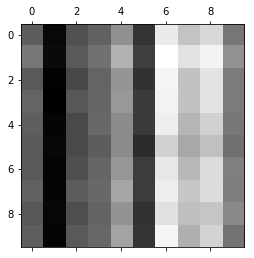

In [114]:
plt.matshow(sgd_conf_mx, cmap=plt.cm.gray)
plt.show()

Classification report for 50000 sample training set

In [111]:
from sklearn import metrics
print ('Score:  ',(metrics.classification_report(y_train_pred2, y2_train)))

Score:                precision    recall  f1-score   support

          0       0.08      0.10      0.09      3861
          1       0.01      0.13      0.02       531
          2       0.06      0.09      0.07      3362
          3       0.08      0.10      0.09      4101
          4       0.11      0.09      0.10      5996
          5       0.04      0.08      0.06      2382
          6       0.18      0.10      0.13      9082
          7       0.15      0.10      0.12      7395
          8       0.16      0.09      0.12      8344
          9       0.09      0.09      0.09      4946

avg / total       0.12      0.10      0.10     50000



KNN

In [20]:
from sklearn.cross_validation import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn import datasets
from skimage import exposure
from sklearn.datasets import fetch_mldata
import numpy as np

mnist = fetch_mldata('MNIST original')
mnist
 
# take the MNIST data and construct the training and testing split, using 75% of the
# data for training and 25% for testing
(trainData, testData, trainLabels, testLabels) = train_test_split(np.array(mnist.data),
	mnist.target, test_size=0.25, random_state=42)
 
# now, let's take 10% of the training data and use that for validation
(trainData, valData, trainLabels, valLabels) = train_test_split(trainData, trainLabels,
	test_size=0.1, random_state=84)

print("training data points: {}".format(len(trainLabels)))
print("validation data points: {}".format(len(valLabels)))
print("testing data points: {}".format(len(testLabels)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


training data points: 47250
validation data points: 5250
testing data points: 17500


In [21]:
# initialize the values of k for our k-Nearest Neighbor classifier along with the
# list of accuracies for each value of k
kVals = range(1, 10, 2)
accuracies = []
 
# loop over various values of `k` for the k-Nearest Neighbor classifier
for k in range(1, 10, 2):
	# train the k-Nearest Neighbor classifier with the current value of `k`
	modelknn = KNeighborsClassifier(n_neighbors=k)
	modelknn.fit(trainData, trainLabels)
 
	# evaluate the model and update the accuracies list
	score = modelknn.score(valData, valLabels)
	print("k=%d, accuracy=%.2f%%" % (k, score * 100))
	accuracies.append(score)
 
# find the value of k that has the largest accuracy
i = np.argmax(accuracies)
print("k=%d achieved highest accuracy of %.2f%% on validation data" % (kVals[i],
	accuracies[i] * 100))

k=1, accuracy=97.35%
k=3, accuracy=97.68%
k=5, accuracy=97.43%
k=7, accuracy=97.28%
k=9, accuracy=97.09%
k=3 achieved highest accuracy of 97.68% on validation data


In [22]:
# re-train our classifier using the best k value and predict the labels of the
# test data
modelknn = KNeighborsClassifier(n_neighbors=kVals[i])
modelknn.fit(trainData, trainLabels)
predictions = modelknn.predict(testData)
 
# show a final classification report demonstrating the accuracy of the classifier
# for each of the digits
print("EVALUATION ON TESTING DATA")
print(classification_report(testLabels, predictions))

EVALUATION ON TESTING DATA
             precision    recall  f1-score   support

        0.0       0.97      0.99      0.98      1677
        1.0       0.96      1.00      0.98      1935
        2.0       0.98      0.97      0.98      1767
        3.0       0.97      0.97      0.97      1766
        4.0       0.97      0.97      0.97      1691
        5.0       0.98      0.96      0.97      1653
        6.0       0.98      0.99      0.98      1754
        7.0       0.97      0.97      0.97      1846
        8.0       0.98      0.94      0.96      1702
        9.0       0.95      0.96      0.95      1709

avg / total       0.97      0.97      0.97     17500



In [25]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
y_train_pred = cross_val_predict(modelknn, X_train, y_train, cv=3)
conf_mx = confusion_matrix(y_train, y_train_pred)
conf_mx

array([[5886,    4,    3,    0,    1,    6,   16,    2,    1,    4],
       [   1, 6706,   11,    1,    2,    0,    3,   11,    1,    6],
       [  43,   54, 5730,   12,   10,    5,    9,   79,   10,    6],
       [   6,   19,   42, 5907,    1,   59,    5,   33,   35,   24],
       [   9,   52,    1,    1, 5637,    0,   14,    9,    2,  117],
       [  19,   14,    9,   68,    9, 5206,   56,    6,    9,   25],
       [  25,   12,    1,    0,    8,   24, 5845,    0,    3,    0],
       [   4,   57,   16,    3,   16,    1,    0, 6105,    1,   62],
       [  26,   77,   37,   89,   32,   80,   22,   17, 5406,   65],
       [  15,   15,    7,   41,   59,   12,    2,   74,    7, 5717]], dtype=int64)

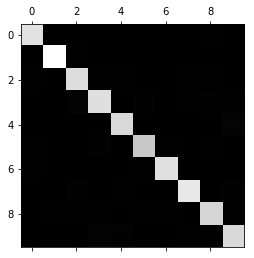

In [115]:
plt.matshow(conf_mx, cmap=plt.cm.gray)
plt.show()

In [51]:
y_knnscores = cross_val_predict(modelknn, X_train, y_train_pred, cv=3)
y_knnscores.shape

(60000,)

 Sample size = 60000 : 10000, Classifier = lbgs

 One hidden layer neural network

  Changed batch size, num_epochs, hidden size and activation function

In [118]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

batch_size = 130 # in each iteration, we consider 128 training examples at once
num_epochs = 25 # we iterate twenty-five times over the entire training set
hidden_size = 256 # there will be 256 neurons in both hidden layers

num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(height * width,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(hidden_size, activation='tanh')(inp) # First hidden tanh layer

out = Dense(num_classes, activation='softmax')(hidden_1) # Output softmax layer

model_1hid = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model_1hid.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model_1hid.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation

Y_pred = model_1hid.predict(X_test)

model_1hid.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 3s - loss: 0.3607 - acc: 0.8964 - val_loss: 0.1862 - val_acc: 0.9503
Epoch 2/25
54000/54000 [==============================] - 3s - loss: 0.1977 - acc: 0.9428 - val_loss: 0.1480 - val_acc: 0.9585
Epoch 3/25
54000/54000 [==============================] - 3s - loss: 0.1411 - acc: 0.9592 - val_loss: 0.1100 - val_acc: 0.9697
Epoch 4/25
54000/54000 [==============================] - 3s - loss: 0.1060 - acc: 0.9693 - val_loss: 0.0937 - val_acc: 0.9740
Epoch 5/25
54000/54000 [==============================] - 3s - loss: 0.0839 - acc: 0.9761 - val_loss: 0.0883 - val_acc: 0.9745
Epoch 6/25
54000/54000 [==============================] - 3s - loss: 0.0667 - acc: 0.9809 - val_loss: 0.0827 - val_acc: 0.9752
Epoch 7/25
54000/54000 [==============================] - 3s - loss: 0.0541 - acc: 0.9848 - val_loss: 0.0766 - val_acc: 0.9773
Epoch 8/25
54000/54000 [==============================] - 3s -

[0.071374203202531128, 0.98129999999999995]

In [119]:
from sklearn.metrics import classification_report,confusion_matrix

Y_1hidpred2 = model_1hid.predict(X_test)
print(Y_1hidpred2)
y_pred1hid2 = np.argmax(Y_1hidpred2, axis=1)
print(y_pred1hid2)
hid1_conf_mx = confusion_matrix(np.argmax(Y_test,axis=1), y_pred1hid2)
print(hid1_conf_mx)

[[  1.96323152e-10   7.47175132e-15   4.22704982e-10 ...,   9.99998212e-01
    3.41184214e-09   1.08265630e-09]
 [  8.11503642e-10   3.18931779e-05   9.99968052e-01 ...,   1.80929189e-16
    1.73480661e-08   5.70463598e-13]
 [  5.89601645e-10   9.99986291e-01   1.08550466e-06 ...,   3.56213093e-07
    1.20976465e-05   1.98610439e-09]
 ..., 
 [  1.43452619e-14   1.14754762e-14   3.14173562e-15 ...,   2.77476673e-08
    1.60267966e-09   2.93277882e-08]
 [  3.52300139e-13   3.33880140e-13   1.45971576e-14 ...,   2.10395416e-12
    1.26945508e-06   2.54076138e-14]
 [  1.36736816e-10   1.26476251e-11   6.97557301e-09 ...,   1.85575991e-14
    3.60529488e-12   3.67084141e-11]]
[7 2 1 ..., 4 5 6]
[[ 972    1    2    0    1    1    1    1    1    0]
 [   0 1125    4    0    0    1    2    1    2    0]
 [   2    0 1014    4    1    0    1    4    6    0]
 [   0    0    1  998    0    2    0    2    5    2]
 [   2    0    1    1  959    0    6    4    2    7]
 [   3    0    0    9    1  870    3

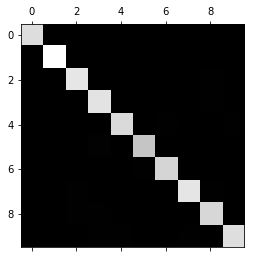

In [120]:
plt.matshow(hid1_conf_mx, cmap=plt.cm.gray)
plt.show()

Two hidden layer neural network

    Changed batch_size, num_epochs, hidden_size and activation function

In [121]:
from keras.datasets import mnist # subroutines for fetching the MNIST dataset
from keras.models import Model # basic class for specifying and training a neural network
from keras.layers import Input, Dense # the two types of neural network layer we will be using
from keras.utils import np_utils # utilities for one-hot encoding of ground truth values

batch_size = 130 # in each iteration, we consider 130 training examples at once
num_epochs = 25 # we iterate twenty times over the entire training set
hidden_size = 256 # there will be 256 neurons in both hidden layers

num_train = 60000 # there are 60000 training examples in MNIST
num_test = 10000 # there are 10000 test examples in MNIST

height, width, depth = 28, 28, 1 # MNIST images are 28x28 and greyscale
num_classes = 10 # there are 10 classes (1 per digit)

(X_train, y_train), (X_test, y_test) = mnist.load_data() # fetch MNIST data

X_train = X_train.reshape(num_train, height * width) # Flatten data to 1D
X_test = X_test.reshape(num_test, height * width) # Flatten data to 1D
X_train = X_train.astype('float32') 
X_test = X_test.astype('float32')
X_train /= 255 # Normalise data to [0, 1] range
X_test /= 255 # Normalise data to [0, 1] range

Y_train = np_utils.to_categorical(y_train, num_classes) # One-hot encode the labels
Y_test = np_utils.to_categorical(y_test, num_classes) # One-hot encode the labels

inp = Input(shape=(height * width,)) # Our input is a 1D vector of size 784
hidden_1 = Dense(hidden_size, activation='tanh')(inp) # First hidden tanh layer
hidden_2 = Dense(hidden_size, activation='tanh')(hidden_1) # Second hidden tanh layer
out = Dense(num_classes, activation='softmax')(hidden_2) # Output softmax layer

model2hid = Model(inputs=inp, outputs=out) # To define a model, just specify its input and output layers

model2hid.compile(loss='categorical_crossentropy', # using the cross-entropy loss function
              optimizer='adam', # using the Adam optimiser
              metrics=['accuracy']) # reporting the accuracy

model2hid.fit(X_train, Y_train, # Train the model using the training set...
          batch_size=batch_size, epochs=num_epochs,
          verbose=1, validation_split=0.1) # ...holding out 10% of the data for validation
model2hid.evaluate(X_test, Y_test, verbose=1) # Evaluate the trained model on the test set!
y_2hid = model2hid.predict(X_test) # Evaluate the trained model on the test set!

Train on 54000 samples, validate on 6000 samples
Epoch 1/25
54000/54000 [==============================] - 5s - loss: 0.3119 - acc: 0.9073 - val_loss: 0.1474 - val_acc: 0.9585
Epoch 2/25
54000/54000 [==============================] - 4s - loss: 0.1470 - acc: 0.9556 - val_loss: 0.1181 - val_acc: 0.9643
Epoch 3/25
54000/54000 [==============================] - 5s - loss: 0.0996 - acc: 0.9692 - val_loss: 0.0843 - val_acc: 0.9753
Epoch 4/25
54000/54000 [==============================] - 4s - loss: 0.0729 - acc: 0.9780 - val_loss: 0.0821 - val_acc: 0.9762
Epoch 5/25
54000/54000 [==============================] - 4s - loss: 0.0564 - acc: 0.9821 - val_loss: 0.0812 - val_acc: 0.9768
Epoch 6/25
54000/54000 [==============================] - 5s - loss: 0.0423 - acc: 0.9869 - val_loss: 0.0660 - val_acc: 0.9798
Epoch 7/25
54000/54000 [==============================] - 4s - loss: 0.0323 - acc: 0.9907 - val_loss: 0.0712 - val_acc: 0.9808
Epoch 8/25
54000/54000 [==============================] - 4s -

In [123]:
from sklearn.metrics import classification_report,confusion_matrix

y_2hid = model2hid.predict(X_test)
print(y_2hid)
y_2hid = np.argmax(y_2hid, axis=1)
print(y_2hid)
hid2_conf_mx = confusion_matrix(np.argmax(Y_test,axis=1), y_2hid)
print(hid2_conf_mx)

[[  7.09610929e-12   4.54231074e-14   3.23972862e-11 ...,   1.00000000e+00
    6.64721611e-10   8.16807844e-10]
 [  8.52288726e-12   2.02034780e-08   1.00000000e+00 ...,   3.04520938e-18
    1.59482288e-11   2.59788376e-14]
 [  7.84062225e-12   1.00000000e+00   1.36498786e-08 ...,   7.07367454e-09
    4.20613482e-08   1.26824898e-10]
 ..., 
 [  3.34844512e-15   4.86209776e-16   3.06362208e-16 ...,   5.11773823e-09
    1.02946429e-09   3.10795301e-08]
 [  9.09099185e-13   4.02684613e-13   2.92317238e-16 ...,   3.24847130e-15
    3.92954558e-09   1.85618922e-13]
 [  1.99131311e-09   2.37517313e-15   5.27918022e-11 ...,   5.02694864e-18
    3.55299346e-10   5.78044882e-13]]
[7 2 1 ..., 4 5 6]
[[ 973    0    1    0    0    1    2    1    2    0]
 [   0 1126    2    0    0    1    2    1    3    0]
 [   3    0 1012    4    1    0    3    4    5    0]
 [   0    0    4  997    0    3    0    3    2    1]
 [   1    0    1    1  964    1    6    1    1    6]
 [   2    0    0    6    1  873    5

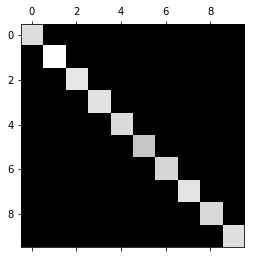

In [124]:
plt.matshow(hid2_conf_mx, cmap=plt.cm.gray)
plt.show()

  RBM

In [69]:
import numpy as np
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')
X, Y = mnist.data, mnist.target
X = np.asarray( X, 'float32')
# Scaling between 0 and 1
X = (X - np.min(X, 0)) / (np.max(X, 0) + 0.0001)  # 0-1 scaling
# Convert to binary images
X = X > 0.5
print ('Input X shape', X.shape)

Input X shape (70000, 784)


  Here learning rate, batch size,n_iter and test_size are changed

In [70]:
from sklearn import cross_validation
from sklearn.pipeline import Pipeline
from sklearn import linear_model
from sklearn.neural_network import BernoulliRBM
from sklearn import svm
from sklearn import metrics
rbm = BernoulliRBM(n_components=200, learning_rate=0.03, batch_size=8, n_iter=6, verbose=True, random_state=None)
sv = clf = svm.SVC(gamma=0.002, C=100.)
clf = Pipeline(steps=[('rbm', rbm), ('clf', sv)])
X_train, X_test, Y_train, Y_test = cross_validation.train_test_split( X, y, test_size=0.1, random_state=0)
clf.fit(X_train, Y_train)
Y_pred = clf.predict(X_test)
print ('Score:  ',(metrics.classification_report(Y_test, Y_pred)))

[BernoulliRBM] Iteration 1, pseudo-likelihood = -95.45, time = 26.74s
[BernoulliRBM] Iteration 2, pseudo-likelihood = -84.97, time = 29.63s
[BernoulliRBM] Iteration 3, pseudo-likelihood = -81.70, time = 30.22s
[BernoulliRBM] Iteration 4, pseudo-likelihood = -82.61, time = 29.88s
[BernoulliRBM] Iteration 5, pseudo-likelihood = -80.45, time = 29.02s
[BernoulliRBM] Iteration 6, pseudo-likelihood = -85.27, time = 29.79s
Score:                precision    recall  f1-score   support

        0.0       0.97      0.99      0.98       660
        1.0       0.98      0.99      0.99       779
        2.0       0.96      0.98      0.97       688
        3.0       0.96      0.95      0.96       733
        4.0       0.97      0.97      0.97       640
        5.0       0.96      0.93      0.95       651
        6.0       0.98      0.98      0.98       738
        7.0       0.98      0.97      0.98       724
        8.0       0.96      0.96      0.96       672
        9.0       0.95      0.96      0.

  Decision tree

Here training and test ratio is changed

In [79]:
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeClassifier

tree_mnist = DecisionTreeClassifier()
a = tree_mnist.fit(X2_train,y2_train)
tree_predictions = a.predict(X2_test)

tree_mse = mean_squared_error(tree_predictions, y2_test)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

4.6727507958375005

In [129]:
from sklearn.metrics import confusion_matrix
dt_conf_mx = confusion_matrix(y2_test, tree_predictions)
print(dt_conf_mx)

[[ 97 100  91  99 100  89 101 116  84 103]
 [118 128  89 120 117  93 110 117 108 135]
 [123 107  94 111 117  87  96  79 110 108]
 [100 112 108 107  92 109  87 106  96  93]
 [114 108 107  78  79  93 105  96  98 104]
 [ 77 103 100  84  91  73  91  92  84  97]
 [109 100  89  88  83  96  89 102 100 102]
 [ 94 135 108 117  80  86 104 102 115  87]
 [465 596 527 492 508 452 503 480 496 506]
 [749 793 810 734 577 660 604 685 619 727]]


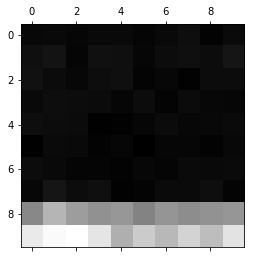

In [131]:
plt.matshow(dt_conf_mx, cmap=plt.cm.gray)
plt.show()

In [84]:
from sklearn import metrics
print (metrics.accuracy_score(tree_predictions, y2_test))

0.0996


    Random Forest

In [91]:
Xf_train, Xf_test, yf_train, yf_test = X[:50000], X[50000:], y[:50000], y[50000:]

In [92]:
shuffle_index = np.random.permutation(50000)
Xf_train, yf_train = Xf_train[shuffle_index], yf_train[shuffle_index]
Xf_train.shape

(50000, 784)

In [93]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100)
rf.fit(Xf_train,yf_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [96]:
y_rf_pred.shape , Xf_test.shape

((20000,), (20000, 784))

In [98]:
from sklearn import metrics
y_rf_pred = rf.predict(Xf_test)

print(metrics.accuracy_score(y_rf_pred,yf_test))

0.60355


In [126]:
from sklearn.metrics import confusion_matrix
rf_conf_mx = confusion_matrix(yf_test, y_rf_pred)
print (rf_conf_mx)

[[ 969    1    0    0    0    4    5    1    0    0]
 [   0 1124    3    3    0    1    4    0    0    0]
 [   8    1  992    7    5    1    5   12    1    0]
 [   0    0    9  981    0    8    0   10    2    0]
 [   1    0    3    0  966    0    7    3    2    0]
 [   5    2    1   14    2  861    6    1    0    0]
 [   8    3    0    0    6    1  940    0    0    0]
 [   1    5   19    1    4    1    0  997    0    0]
 [  24   57   99  204  109  188   71   32 4241    0]
 [  53   39   72  208 5704  160   11  685   26    0]]


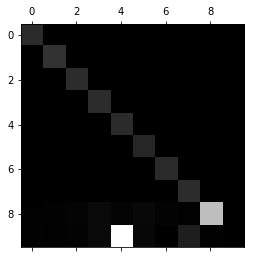

In [127]:
plt.matshow(rf_conf_mx, cmap=plt.cm.gray)
plt.show()

In [100]:
from sklearn import cross_validation
from sklearn import metrics

print ('Score:  ',(metrics.classification_report(yf_test, y_rf_pred)))

Score:                precision    recall  f1-score   support

        0.0       0.91      0.99      0.95       980
        1.0       0.91      0.99      0.95      1135
        2.0       0.83      0.96      0.89      1032
        3.0       0.69      0.97      0.81      1010
        4.0       0.14      0.98      0.25       982
        5.0       0.70      0.97      0.81       892
        6.0       0.90      0.98      0.94       958
        7.0       0.57      0.97      0.72      1028
        8.0       0.99      0.84      0.91      5025
        9.0       0.00      0.00      0.00      6958

avg / total       0.53      0.60      0.55     20000



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [101]:
X_train.shape, y_rf_pred.shape

((63000, 784), (20000,))

In [102]:
Xforest, yforest = mnist["data"], mnist["target"]
Xforest.shape

(70000, 784)